#                        - Computational Neuroscience 2021-2022 Final Project -        ;;

##   Project Name: Combinatorial Codes in Ventral Temporal Lobe for Visual Object Recognition



In [2]:
!pip install umap
!pip install pipreqs
!pip install lazypredict
!pip install nibabel
!pip install nilearn
!pip install -U kaleido


try:
    import sklearn
    print('Scikit-learn is available, version', sklearn.__version__)
    
except:
    !pip install scikit-learn
    
 
try:
    import cv2
    print('Open-CV is available, version', cv2.__version__)
    
except:
     !pip install opencv-python
    
   
try:
    import seaborn
    print('Seaborn is available, version', seaborn.__version__)
    
except:
     !pip install seaborn


Requirement already up-to-date: kaleido in d:\python\lib\site-packages (0.2.1)
Scikit-learn is available, version 0.23.1
Open-CV is available, version 4.5.1
Seaborn is available, version 0.11.0


In [5]:
from __future__ import print_function, division

# Basics:
import numpy as np,pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import os, random, time, sys, copy, math, pickle

# interactive mode
plt.ion()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# For plotting
import plotly.io as plt_io
import plotly.graph_objects as go
%matplotlib inline

# Dimension Reduction Algorithms:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
import umap

# Transformations
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Metrics:
from sklearn.metrics import classification_report

# Train-Test Splitter:
from sklearn.model_selection import train_test_split

# For Classical ML algorithms:
from lazypredict.Supervised import LazyClassifier

# Utilies:
from tqdm import tqdm

# For distance measurements:
from scipy.spatial.distance import cdist

# Extras:
from abc import abstractmethod
from typing import Callable, Iterable, List, Tuple

# Set true for Google Colab:
COLAB = False

if COLAB:
    # To access Google Drive:
    from google.colab import drive
    drive.mount("/content/gdrive")

    
# For neuroimaging:
from nibabel.testing import data_path
from nilearn import plotting as nplt
from nilearn.input_data import NiftiMasker
from nilearn import datasets
from nilearn import plotting
from nilearn.image import mean_img
from nilearn.image import index_img
import nibabel as nib
from nilearn import image



print("NumPy Version: ", np.__version__)

root_dir = r'C:\Users\Administrator\Desktop\VOR'
os.chdir(root_dir)
image_results_dir = os.path.join(root_dir, 'images')
results_dir = os.path.join(root_dir, 'results')

print('Working Directory: \n ', root_dir)


# Creating requirements.txt file
!pip3 freeze > requirements.txt  

NumPy Version:  1.19.1
Working Directory: 
  C:\Users\Administrator\Desktop\VOR


In [6]:
from utils.timers import timeit
from utils.metrics import accuracy, confusion_matrix, visualize_confusion_matrix
from utils.savers import save, save_obj, load, load_obj
from utils.reproduce import random_seed
from dataset.fetch_data_matrix import fetch_from_haxby
from visualizer.plot2D import plot_2d
from visualizer.plot3D import plot_3d  

In [7]:
# Loading:
fmri_imgs_mat, masks, categories = load('fMRI_data'), load('masked_data'), load('labels')

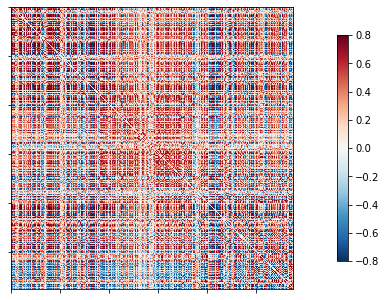

In [10]:
from nilearn.connectome import ConnectivityMeasure


subject_id = 0

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([masks[subject_id]])[0]

fig = plt.figure()

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix,
                     colorbar=True,
                     vmax=0.8, vmin=-0.8,
                     figure = fig)
plotting.show()


### Precision 

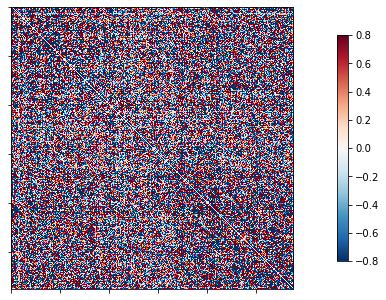

In [13]:
correlation_measure = ConnectivityMeasure(kind='precision')
correlation_matrix = correlation_measure.fit_transform([masks[subject_id]])[0]

fig = plt.figure()

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, colorbar=True,
                     vmax=0.8,
                     vmin=-0.8,
                     figure = fig)
plotting.show()

### Partial Correlation 

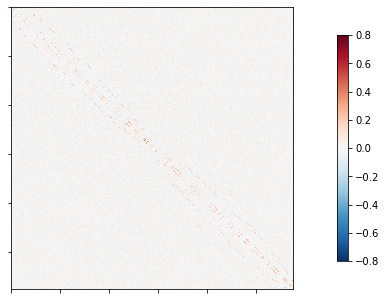

In [14]:
correlation_measure = ConnectivityMeasure(kind='partial correlation')
correlation_matrix = correlation_measure.fit_transform([masks[subject_id]])[0]
fig = plt.figure()

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, colorbar=True,
                     vmax=0.8, vmin=-0.8,figure = fig)
plotting.show()


### Cosine 

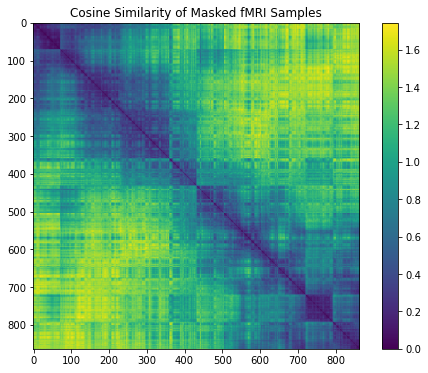

In [15]:
fig = plt.figure(figsize=(8,6))
plt.imshow(cdist(masks[subject_id], masks[subject_id], metric='cosine'))
plt.colorbar()
plt.title('Cosine Similarity of Masked fMRI Samples')
plt.show()

###  Minkowski

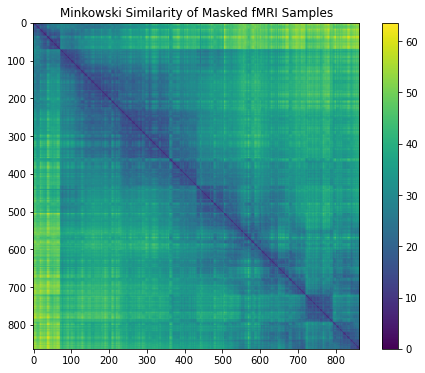

In [16]:
fig = plt.figure(figsize=(8,6))
plt.imshow(cdist(masks[subject_id], masks[subject_id], metric='minkowski'))
plt.colorbar()
plt.title('Minkowski Similarity of Masked fMRI Samples')
plt.show()

### Euclidean

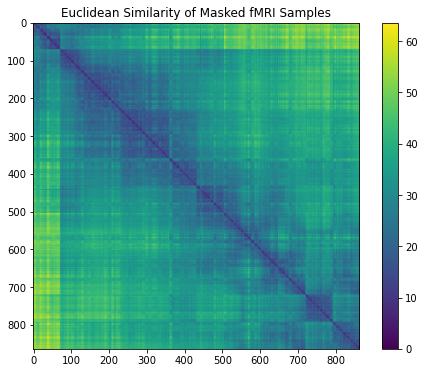

In [17]:
fig = plt.figure(figsize=(8,6))
plt.imshow(cdist(masks[subject_id], masks[subject_id]))
plt.colorbar()
plt.title('Euclidean Similarity of Masked fMRI Samples')
plt.show()